In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings('ignore')

***Data Understanding***

In [50]:
df = pd.read_csv('loan_approval_dataset.csv')

In [51]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [53]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [54]:
df.shape

(4269, 13)

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


***Data Exploration***

In [56]:
df.duplicated().sum()

0

In [57]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
df[' loan_status'].value_counts() 

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

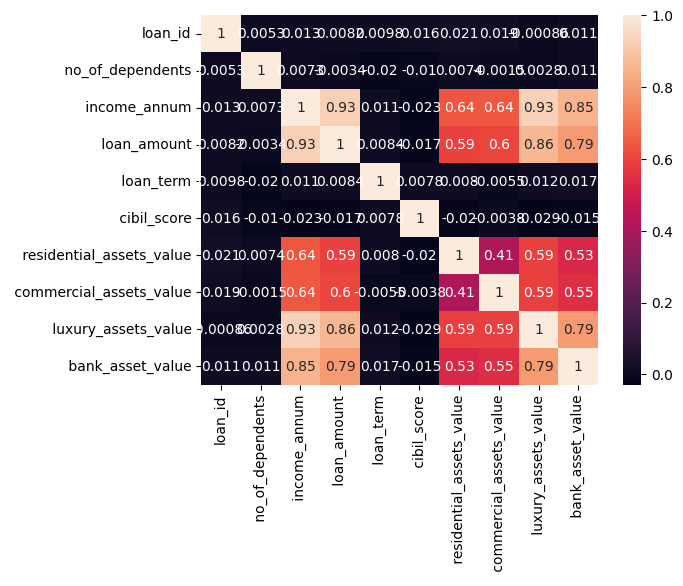

In [59]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

***EDA & INSIGHTS***

In [62]:
df[" loan_status"].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

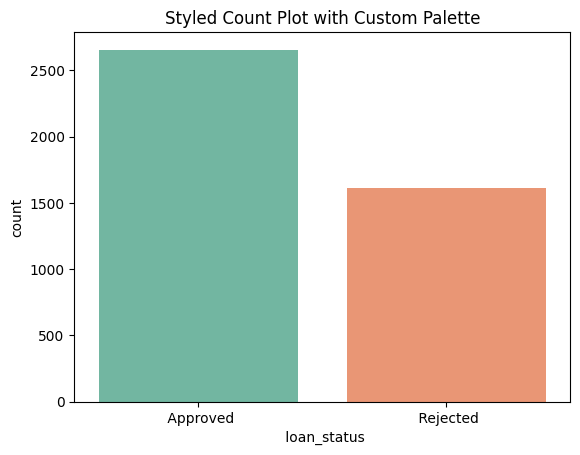

In [63]:
sns.countplot(x=' loan_status', data=df, palette='Set2')
plt.title('Styled Count Plot with Custom Palette')
plt.show()

In [64]:
df[" loan_status"].value_counts()*100/len(df)

 loan_status
Approved    62.215976
Rejected    37.784024
Name: count, dtype: float64

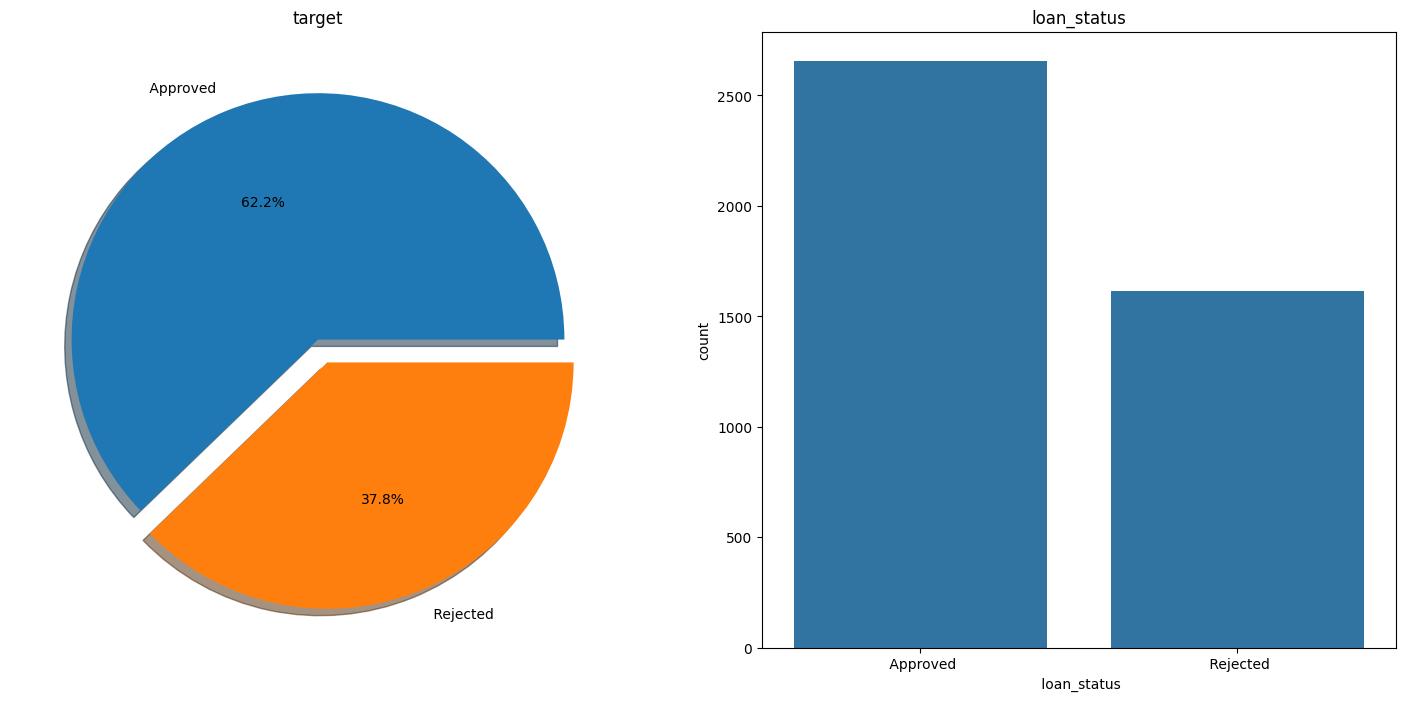

In [65]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df[' loan_status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x=' loan_status',data=df,ax=ax[1])
ax[1].set_title('loan_status')
plt.show()

***Encoding Categorical Columns***

In [ ]:
le=LabelEncoder()

In [66]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [67]:
df[' loan_status']=le.fit_transform(df[' loan_status'])
df[' education']=le.fit_transform(df[' education'])
df[' self_employed']=le.fit_transform(df[' self_employed'])

In [68]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


***Balance Data(bonus)***

Total class distribution (1 and 0):
 loan_status
1    2656
0    2656
Name: count, dtype: int64


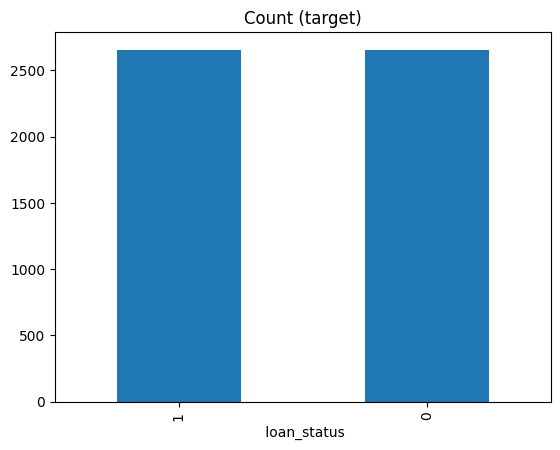

In [69]:
# Assuming your data is in a DataFrame called df
# Separate the classes
class_0 = df[df[' loan_status'] == 0]
class_1 = df[df[' loan_status'] == 1]

# Get the count of class 0
class_count_0 = class_0.shape[0]

# Over-sample class 1 to match the count of class 0 (with replacement)
class_1_over = class_1.sample(class_count_0, replace=True)

# Concatenate the over-sampled class 1 with class 0
df = pd.concat([class_1_over, class_0], axis=0)

# Check the distribution of the classes after over-sampling
print("Total class distribution (1 and 0):")
print(df[' loan_status'].value_counts())

# Plot the distribution
df[' loan_status'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

***Handling Outliers***

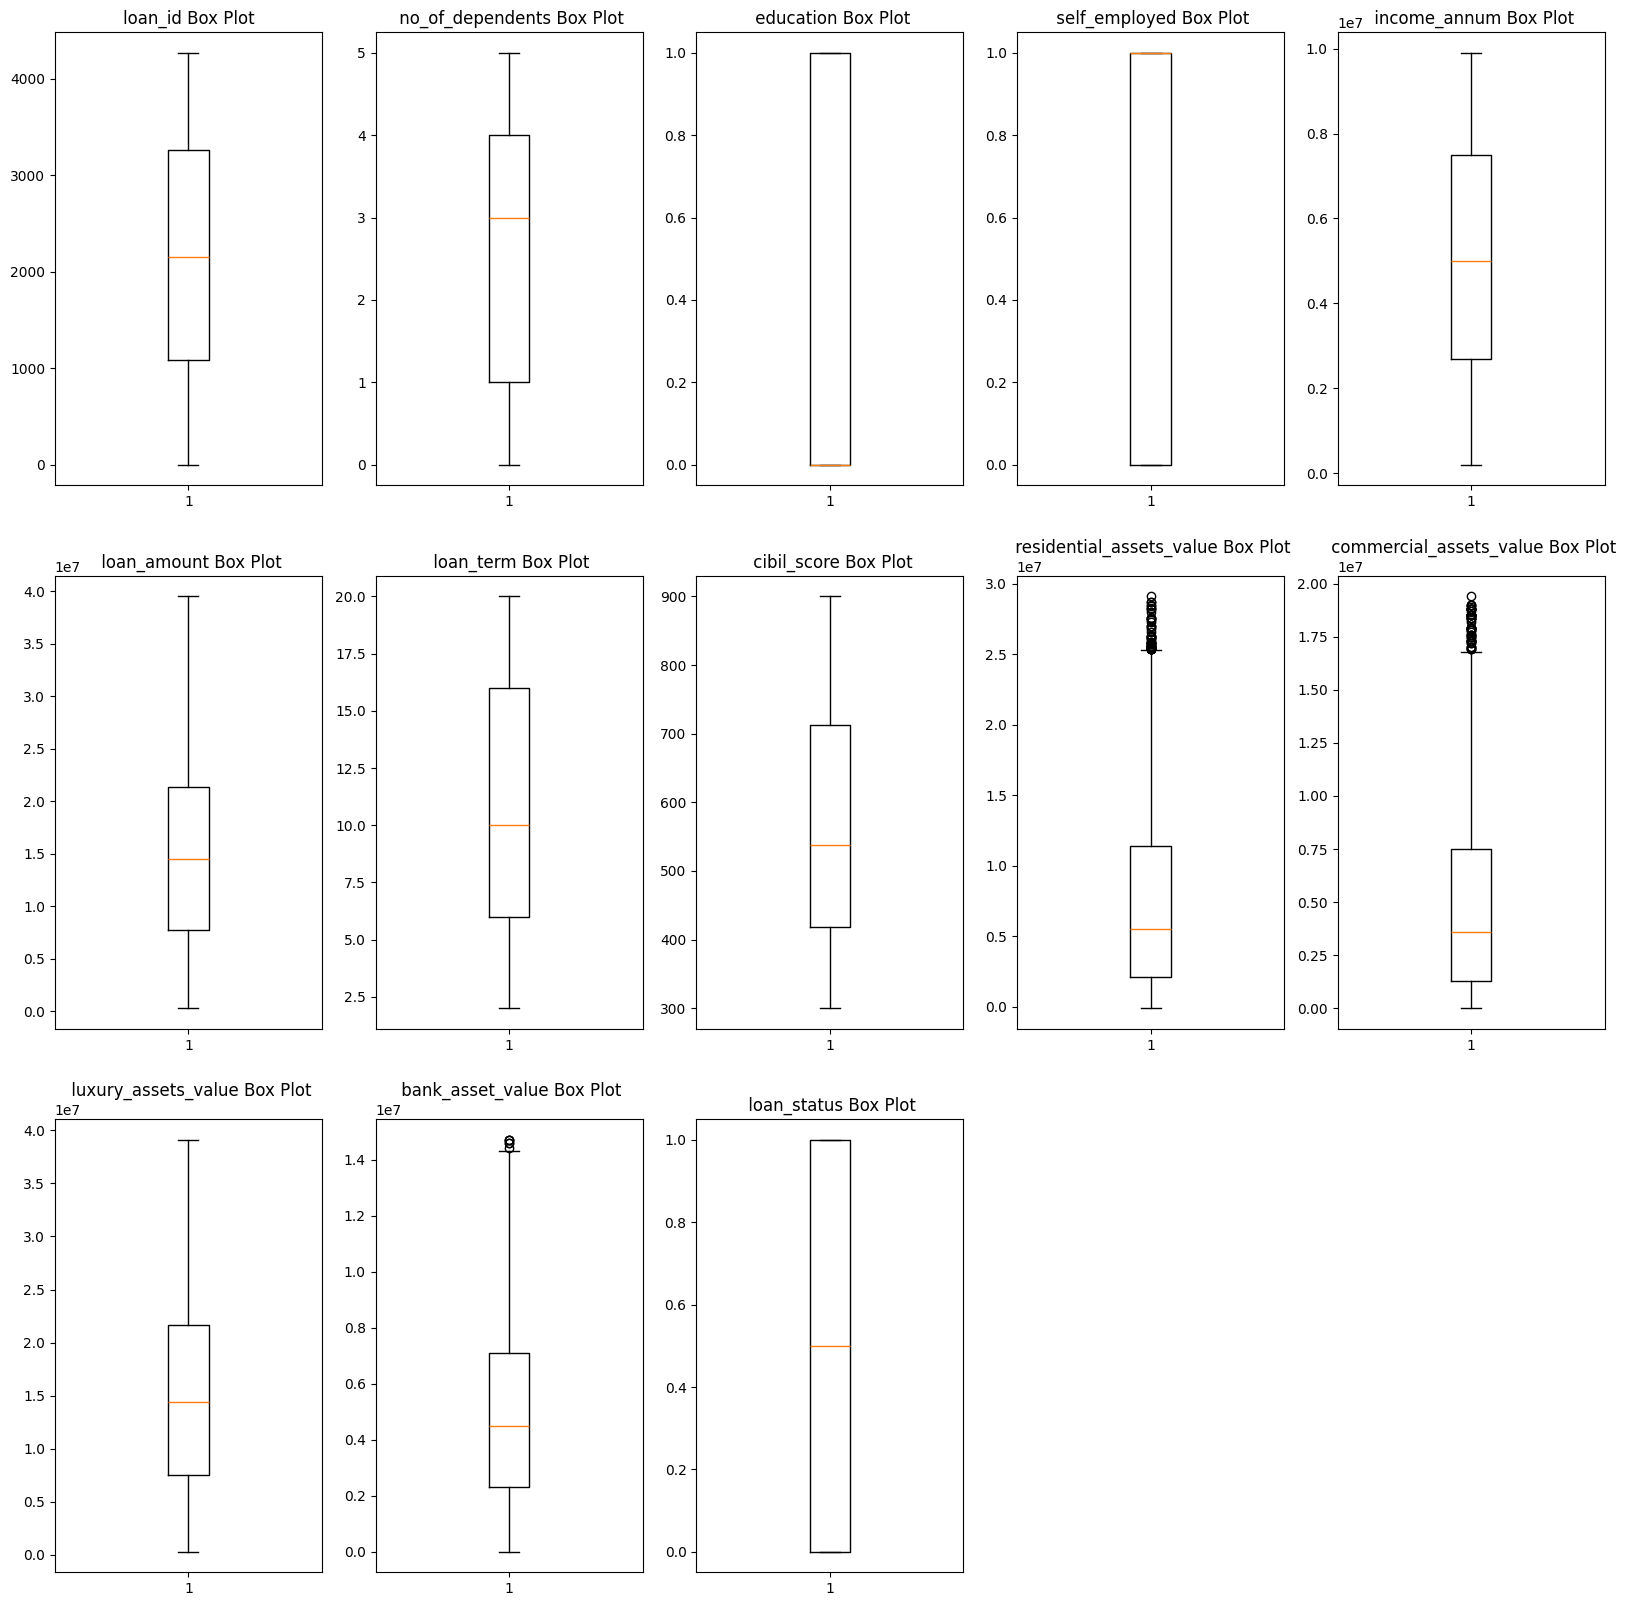

In [70]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(20,20))
for i , col in enumerate(Numeric_columns):
    plt.subplot(3,5,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col} Box Plot')
plt.show() 

In [71]:

for col in Numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Upper_Fennse = Q3 + (1.5*IQR)
    lower_fennse = Q1 - (1.5*IQR)
    Low_Outlier = df[df[col] < lower_fennse][col].values
    Up_Outlier = df[df[col] > Upper_Fennse][col].values
    df[col].replace(Low_Outlier , lower_fennse , inplace=True)
    df[col].replace(Up_Outlier , Upper_Fennse , inplace=True)


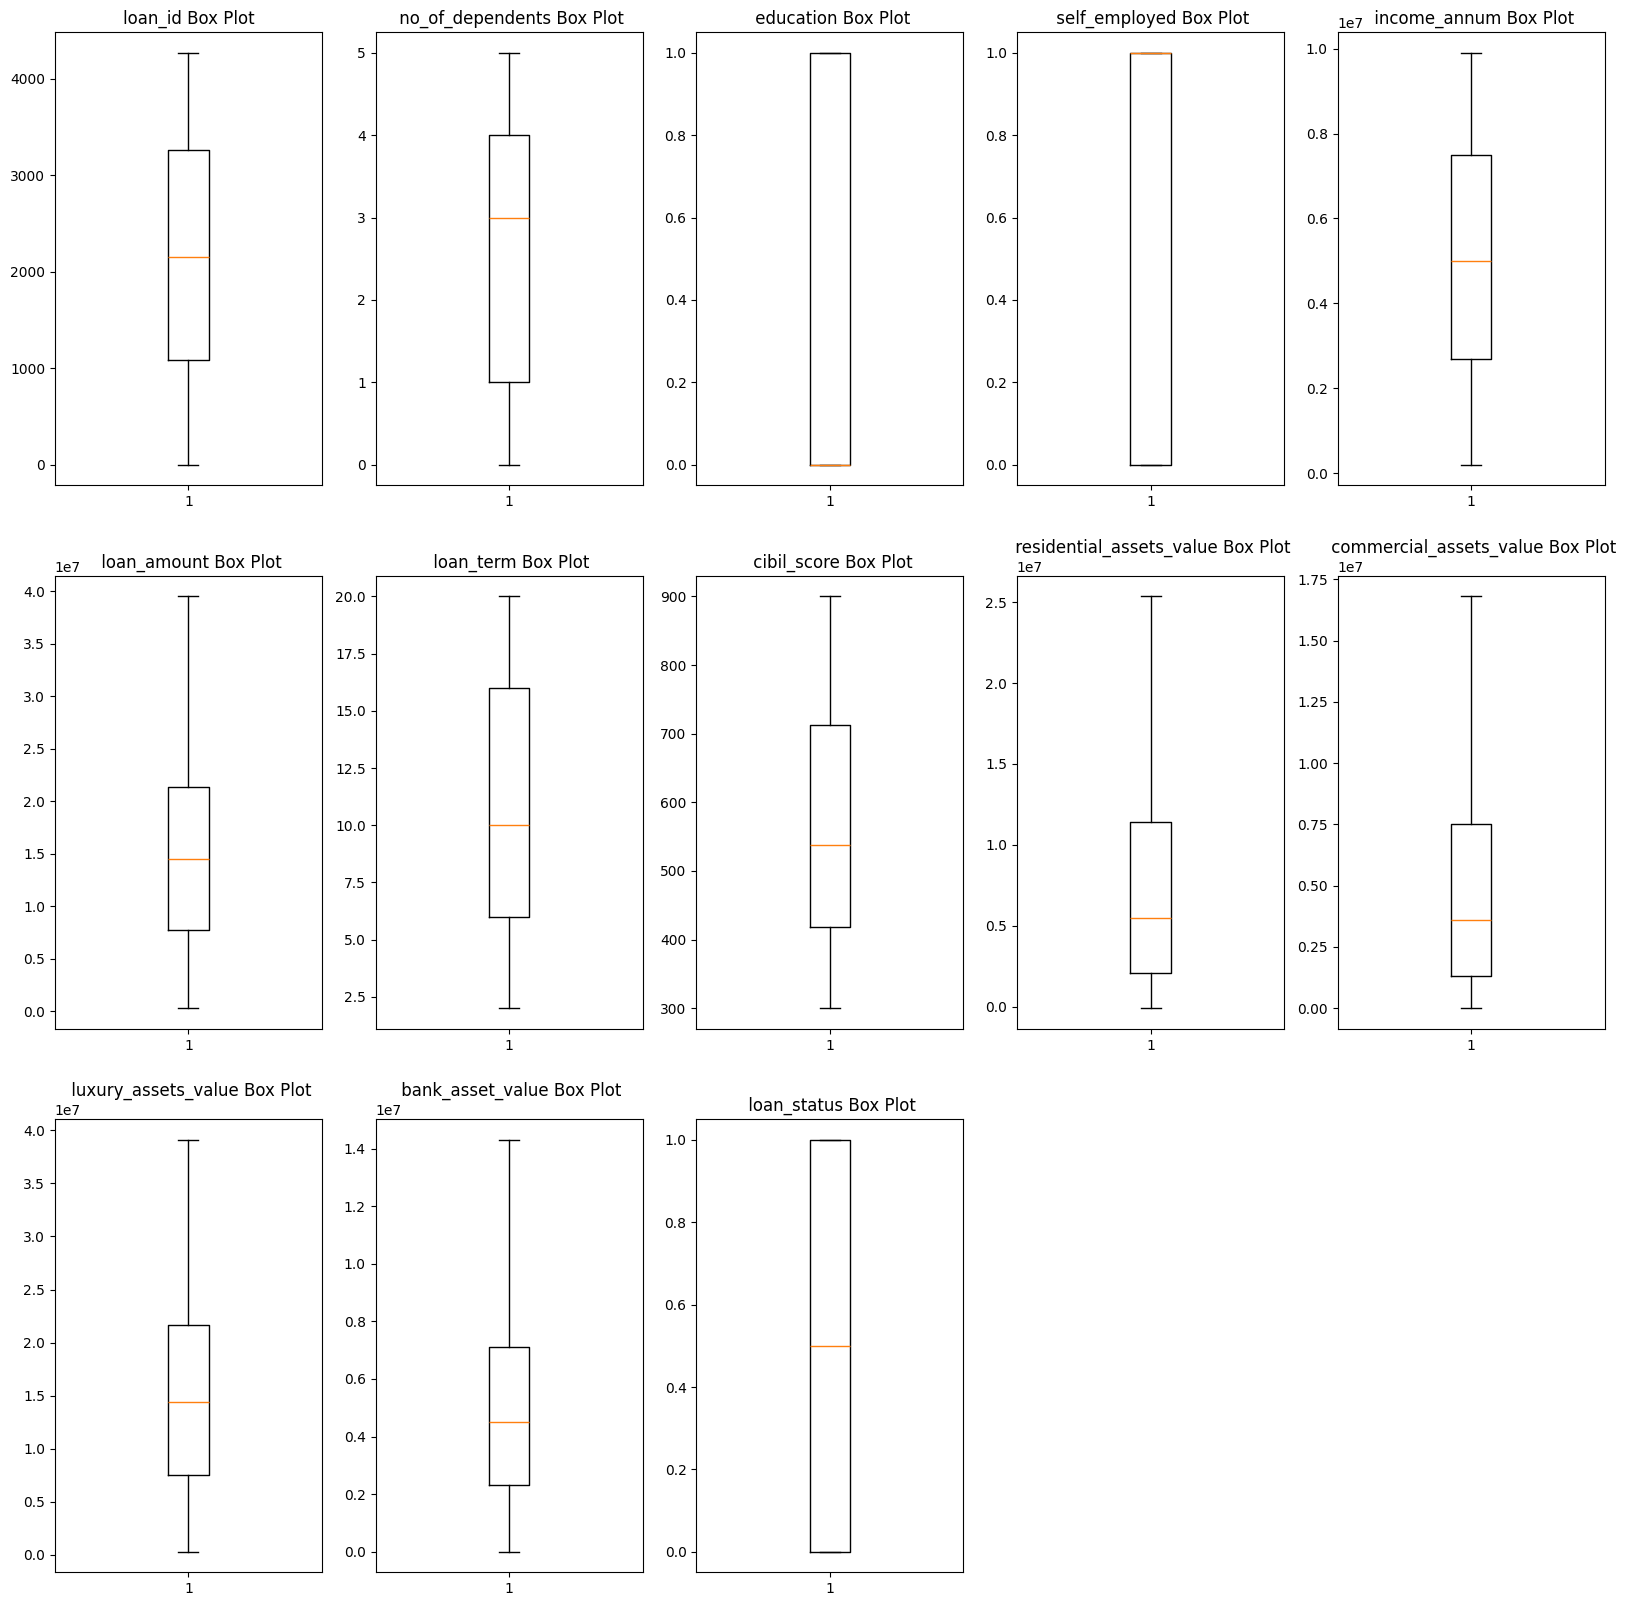

In [72]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(20,20))
for i , col in enumerate(Numeric_columns):
    plt.subplot(3,5,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col} Box Plot')
plt.show()

In [73]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3863,3864,3,0,0,4700000,9600000,10,545,5200000,7200000,12000000,5300000,1
346,347,5,0,1,8000000,28000000,10,449,18500000,1500000,17400000,3900000,1
1141,1142,0,0,0,2900000,9800000,16,395,5400000,4300000,8600000,2400000,1
4005,4006,0,0,0,7900000,22700000,18,508,6600000,7000000,31600000,8900000,1
1094,1095,2,1,1,5300000,21200000,14,516,2200000,5000000,20900000,7700000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,4262,3,0,1,3000000,7500000,6,881,1400000,4500000,6100000,2300000,0
4263,4264,3,0,0,5000000,12700000,14,865,4700000,8100000,19500000,6300000,0
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [74]:
df[" loan_status"].value_counts()*100/len(df)

 loan_status
1    50.0
0    50.0
Name: count, dtype: float64

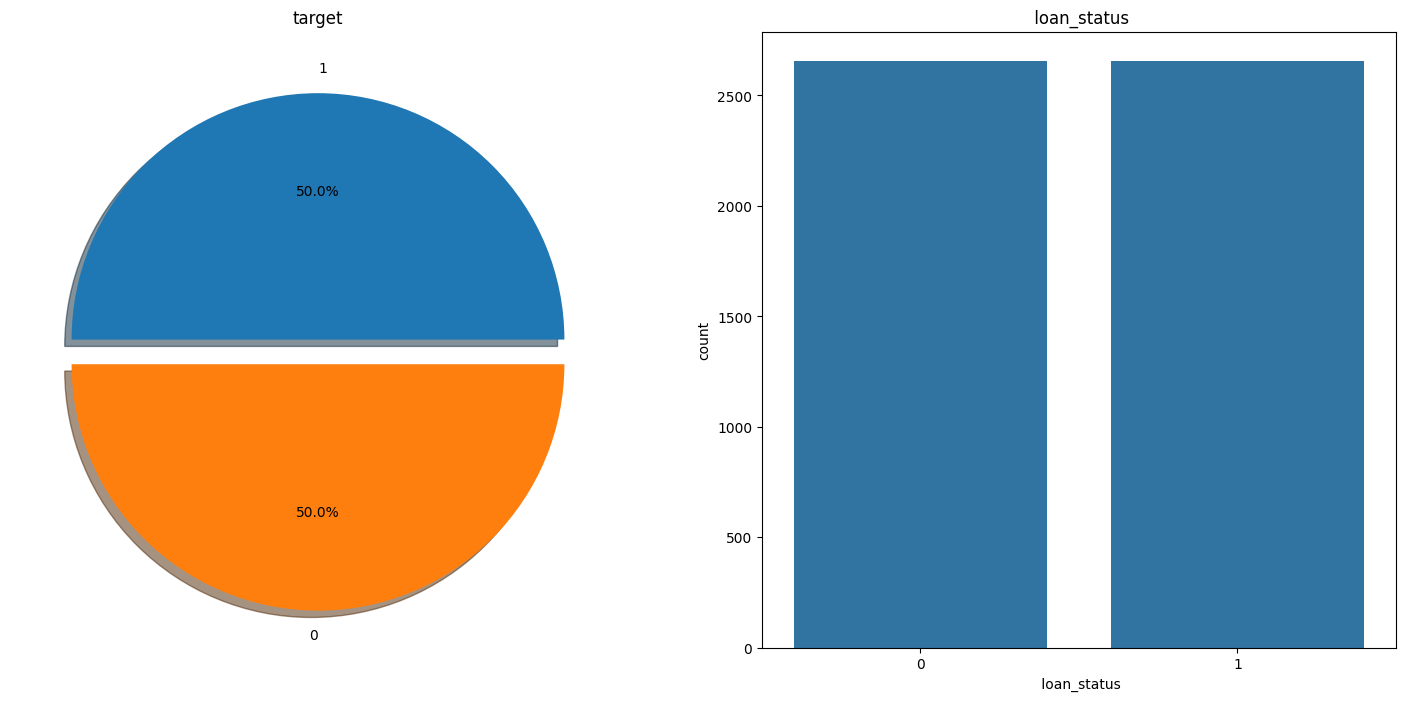

In [75]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df[' loan_status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x=' loan_status',data=df,ax=ax[1])
ax[1].set_title(' loan_status')
plt.show()

In [76]:
df.shape

(5312, 13)

***Spliting Data***

In [77]:
x=df.drop(columns=[' loan_status'])
y=df[' loan_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

***Normalizatio of Data***

In [78]:
from sklearn.preprocessing import MinMaxScaler
numCol = df.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(df[numCol])
df[numCol] = scaler.transform(df[numCol])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3863,0.905108,0.6,0.0,0.0,0.463918,0.237245,0.444444,0.408333,0.208251,0.428571,0.301546,0.370629,1.0
346,0.081068,1.0,0.0,1.0,0.804124,0.706633,0.444444,0.248333,0.730845,0.089286,0.440722,0.272727,1.0
1141,0.267338,0.0,0.0,0.0,0.278351,0.242347,0.777778,0.158333,0.216110,0.255952,0.213918,0.167832,1.0
4005,0.938379,0.0,0.0,0.0,0.793814,0.571429,0.888889,0.346667,0.263261,0.416667,0.806701,0.622378,1.0
1094,0.256326,0.4,1.0,1.0,0.525773,0.533163,0.666667,0.360000,0.090373,0.297619,0.530928,0.538462,1.0


***Modeling(bonus)***


In [79]:
def evaluate_model(model,pred):
    print(f'Accuracy Train Score : {model.score(x_train,y_train)}\n')
    print(f'Accuracy Test Score : {model.score(x_test,y_test)}\n')
    print(f'Classification Report: \n{classification_report(y_test,pred)}\n')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.show()

In [80]:
lr=LogisticRegression()

In [81]:
lr.fit(x_train,y_train)

LogisticRegression()

In [82]:
y_pred_lr=lr.predict(x_test)

Accuracy Train Score : 0.7244057425276536

Accuracy Test Score : 0.6895578551269991

Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       520
           1       0.75      0.59      0.66       543

    accuracy                           0.69      1063
   macro avg       0.70      0.69      0.69      1063
weighted avg       0.70      0.69      0.69      1063




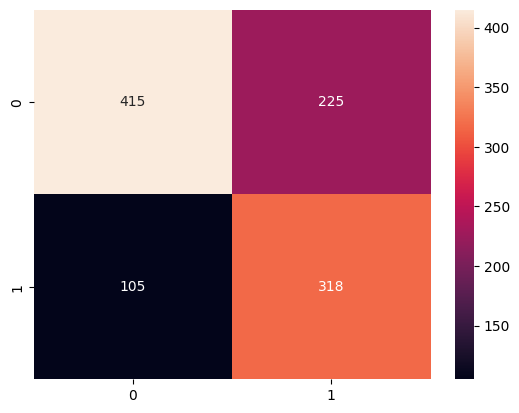

In [83]:
evaluate_model(lr,y_pred_lr)

In [84]:
dt=DecisionTreeClassifier()

In [85]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [86]:
y_pred_dt=dt.predict(x_test)

Accuracy Train Score : 1.0

Accuracy Test Score : 0.9830667920978363

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       520
           1       0.97      0.99      0.98       543

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063




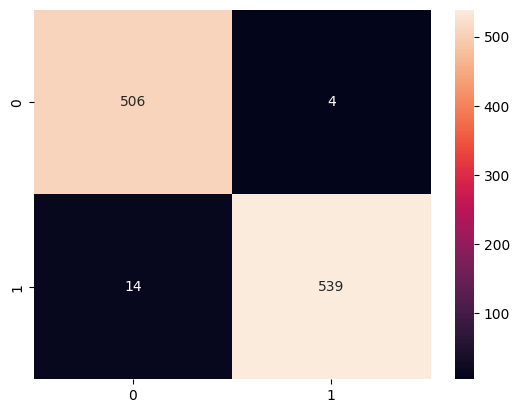

In [87]:
evaluate_model(dt,y_pred_dt)